In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train_dataset.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.drop("Loan_ID", axis=1, inplace=True)

In [7]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.isna().sum().sum()

np.int64(149)

In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
nan_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [12]:
nan_cols

['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [13]:
for c in nan_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

In [14]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [15]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [16]:
df["Loan_Amount_Term"].isna().sum()

np.int64(14)

In [17]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)

In [18]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [20]:
df["LoanAmount"].nunique()

203

In [21]:
df["LoanAmount"].mean().round()

np.float64(146.0)

In [22]:
df["LoanAmount"].fillna(df["LoanAmount"].mean().round(), inplace=True)

In [23]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### NaNs

In [24]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Error Detection

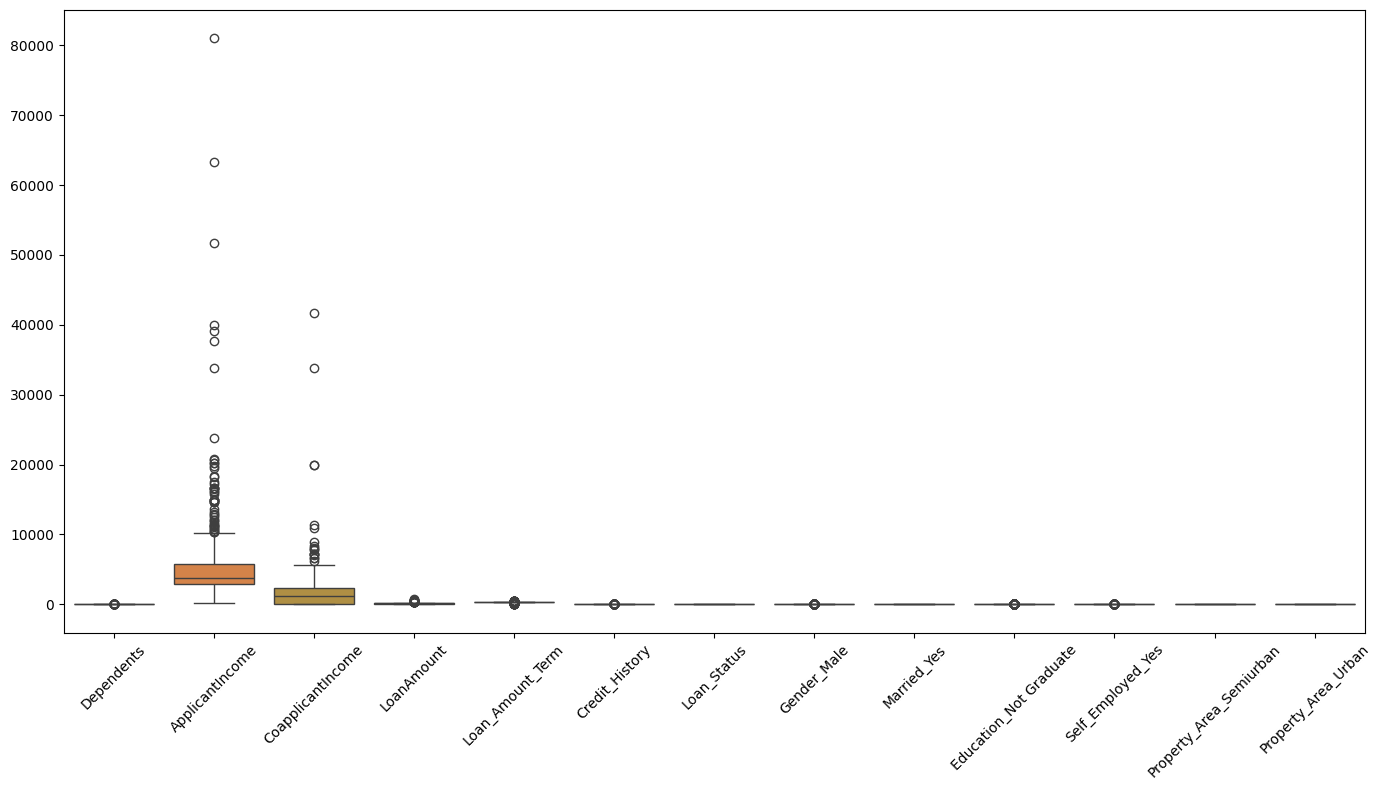

In [143]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: ylabel='LoanAmount'>

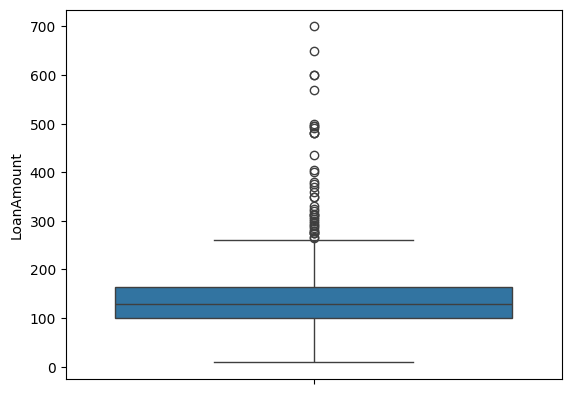

In [26]:
sns.boxplot(df["LoanAmount"])

<Axes: ylabel='Loan_Amount_Term'>

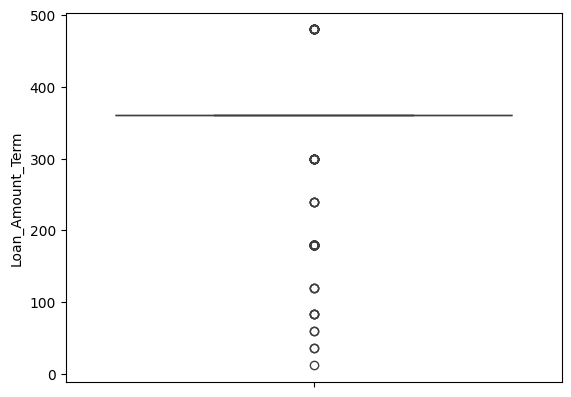

In [27]:
sns.boxplot(df["Loan_Amount_Term"])

<Axes: ylabel='ApplicantIncome'>

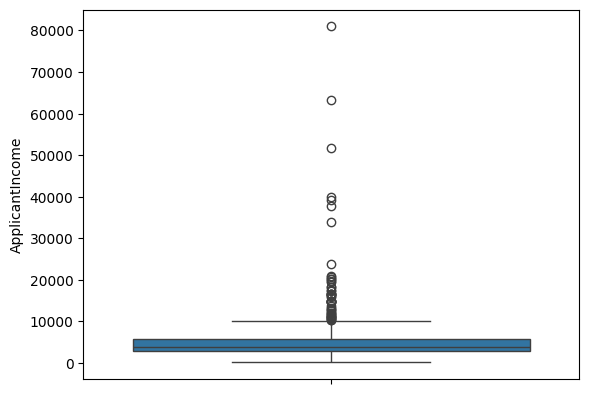

In [28]:
sns.boxplot(df["ApplicantIncome"])

In [29]:
df["CoapplicantIncome"].max()

np.float64(41667.0)

<Axes: ylabel='CoapplicantIncome'>

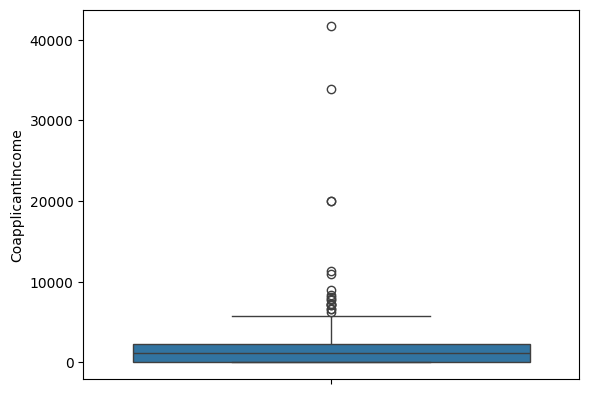

In [30]:
sns.boxplot(df["CoapplicantIncome"])

### Encoding

In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Label Encoding on Dependent Column

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label = LabelEncoder()

In [34]:
label

LabelEncoder()

In [35]:
label.fit(df["Loan_Status"])

LabelEncoder()

In [36]:
label.transform(df["Loan_Status"])

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [37]:
ary = label.transform(df["Loan_Status"])

In [38]:
ary

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [39]:
label.classes_

array(['N', 'Y'], dtype=object)

In [40]:
df["Loan_Status"].map(lambda x: 0 if x == 'N' else 1)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [41]:
df["Loan_Status"] = df["Loan_Status"].map(lambda x: 0 if x == 'N' else 1)

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [43]:
df["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [44]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [45]:
df["Dependents"].map(lambda x: 3 if x == '3+' else int(x))

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

Other Method to convert Dependants column to Integer

In [46]:
df["Dependents"].replace("3+", 3, inplace=True)

In [47]:
df["Dependents"] = df["Dependents"].astype("int")

In [48]:
df["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [49]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Get Dummies

In [50]:
pd.get_dummies(df, drop_first = True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,False,False,False,False,False,False
610,3,4106,0.0,40.0,180.0,1.0,1,True,True,False,False,False,False
611,1,8072,240.0,253.0,360.0,1.0,1,True,True,False,False,False,True
612,2,7583,0.0,187.0,360.0,1.0,1,True,True,False,False,False,True


In [51]:
df = pd.get_dummies(df, drop_first = True)

In [52]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True


In [53]:
df.replace([True, False], [1, 0], inplace=True)

In [54]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1


### Data Separation

In [55]:
X = df.drop("Loan_Status", axis=1)

In [56]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0
610,3,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1


In [57]:
y = df["Loan_Status"]

In [58]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Imbalance

<Axes: xlabel='Loan_Status'>

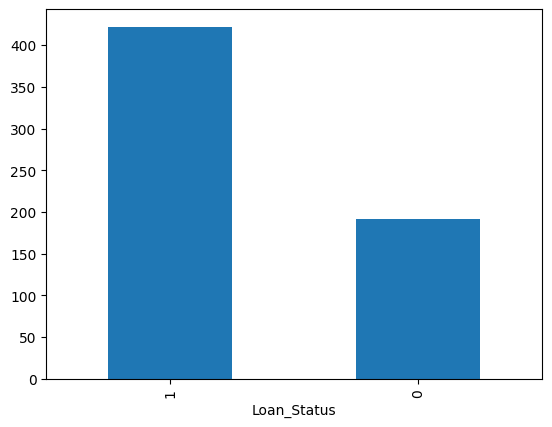

In [59]:
y.value_counts().plot(kind='bar')

In [60]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
ros = RandomOverSampler()

In [62]:
X_ros, y_ros = ros.fit_resample(X, y)

In [63]:
X_ros.shape

(844, 12)

In [64]:
X_ros.value_counts()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban
0           2720             0.0                80.0        360.0             0.0             0            0            1                       0                  0                        1                      6
            14999            0.0                242.0       360.0             0.0             1            0            0                       0                  1                        0                      6
            6782             0.0                146.0       360.0             1.0             1            0            0                       0                  0                        1                      5
            5815             3666.0             311.0       360.0             1.0             1            0            0                       0        

In [65]:
y_ros.shape

(844,)

In [66]:
y_ros.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

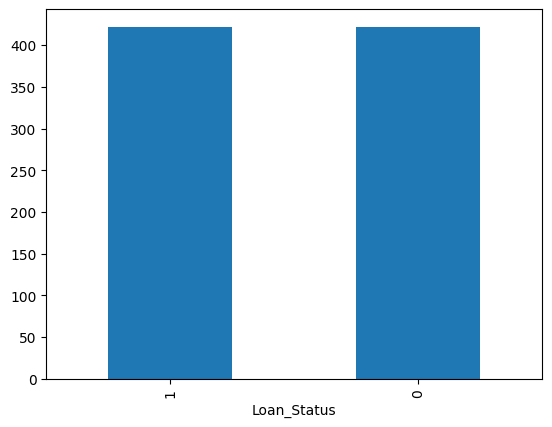

In [67]:
y_ros.value_counts().plot(kind='bar')

### Data Splitting

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.20, random_state = 73)

In [70]:
X_train.shape

(675, 12)

In [71]:
X_test.shape

(169, 12)

In [72]:
X_ros.shape

(844, 12)

In [73]:
y_train.shape

(675,)

In [74]:
y_test.shape

(169,)

In [75]:
y_ros.shape

(844,)

### Model Building

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()

In [78]:
dt

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [80]:
dt.score(X_test, y_test)

0.8520710059171598

### Auto Random State

In [81]:
sc_list=[]
for i in range(1000):
    Xtrain,Xtest,ytrain,ytest=train_test_split(X_ros, y_ros, test_size=0.20, random_state=i)
    dt_model = DecisionTreeClassifier()
    dt_model.fit(Xtrain,ytrain)
    sc=dt_model.score(Xtest,ytest)
    sc_list.append(sc)
m=max(sc_list)
print(m)
id=sc_list.index(m)
print(id)

0.9112426035502958
576


### Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [83]:
dt1 = DecisionTreeClassifier()

In [84]:
dt1

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Normal Cross Validation

In [85]:
score1 = cross_val_score(dt1, X_ros, y_ros, cv = 20, n_jobs = -1)
print(score1)

[0.95348837 0.81395349 0.8372093  0.81395349 0.85714286 0.83333333
 0.85714286 0.80952381 0.80952381 0.9047619  0.88095238 0.85714286
 0.95238095 0.88095238 0.83333333 0.92857143 0.88095238 0.88095238
 0.85714286 0.97619048]


In [86]:
score1.mean()

np.float64(0.8709302325581396)

KFold Cross Validation

In [87]:
kf = KFold(n_splits = 20)

In [88]:
score2 = cross_val_score(dt1, X_ros, y_ros, cv = kf, n_jobs = -1)
score2

array([0.8372093 , 0.81395349, 0.79069767, 0.81395349, 0.9047619 ,
       0.78571429, 0.9047619 , 0.80952381, 0.88095238, 0.80952381,
       0.80952381, 0.73809524, 0.66666667, 0.78571429, 0.9047619 ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [89]:
score2.mean()

np.float64(0.8627906976744185)

Stratified KFold Cross Validation

In [90]:
skf = StratifiedKFold(n_splits = 20)

In [91]:
score3 = cross_val_score(dt1, X_ros, y_ros, cv = skf, n_jobs = -1)
score3

array([0.95348837, 0.8372093 , 0.81395349, 0.81395349, 0.85714286,
       0.85714286, 0.83333333, 0.80952381, 0.80952381, 0.9047619 ,
       0.83333333, 0.85714286, 0.97619048, 0.9047619 , 0.88095238,
       0.95238095, 0.88095238, 0.83333333, 0.85714286, 0.97619048])

In [92]:
score3.mean()

np.float64(0.8721207087486157)

### Accuracy Score

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
dt.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [95]:
y_pred = dt.predict(X_test)

In [96]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [97]:
accuracy_score(y_test, y_pred)

0.8520710059171598

### Auto ML

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [101]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
log = LogisticRegression()
knc = KNeighborsClassifier()
svc = SVC()

In [102]:
models = [dtc, rfc, abc, gbc, log, knc, svc]
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 SVC()]

Auto ML with Normal Cross Validation

In [103]:
for m in models:
    scores = cross_val_score(m, X_ros, y_ros, cv = 20, n_jobs = -1)
    scores.mean()
    print(m, "==>", scores.mean())

DecisionTreeClassifier() ==> 0.8722037652270209
RandomForestClassifier() ==> 0.9136766334440752
AdaBoostClassifier() ==> 0.7407253599114063
GradientBoostingClassifier() ==> 0.8071982281284606
LogisticRegression() ==> 0.6993632336655591
KNeighborsClassifier() ==> 0.5927187153931339
SVC() ==> 0.4845238095238096


Auto ML with KFold Cross Validation

In [104]:
for m in models:
    kf = KFold(n_splits = 20)
    scores = cross_val_score(m, X_ros, y_ros, cv = kf, n_jobs = -1)
    scores.mean()
    print(m, "==>", scores.mean())

DecisionTreeClassifier() ==> 0.8675249169435215
RandomForestClassifier() ==> 0.9100498338870431
AdaBoostClassifier() ==> 0.7357419712070874
GradientBoostingClassifier() ==> 0.7975913621262458
LogisticRegression() ==> 0.6941860465116279
KNeighborsClassifier() ==> 0.5892303433001107
SVC() ==> 0.3620708748615725


Auto ML with Stratified KFold Cross Validation

In [105]:
for m in models:
    skf = StratifiedKFold(n_splits = 20)
    scores = cross_val_score(m, X_ros, y_ros, cv = skf, n_jobs = -1)
    scores.mean()
    print(m, "==>", scores.mean())

DecisionTreeClassifier() ==> 0.8674418604651162
RandomForestClassifier() ==> 0.9088870431893685
AdaBoostClassifier() ==> 0.7407253599114063
GradientBoostingClassifier() ==> 0.8060077519379846
LogisticRegression() ==> 0.6993632336655591
KNeighborsClassifier() ==> 0.5927187153931339
SVC() ==> 0.4845238095238096


### Hyper Parameter Tuning

In [106]:
import time

In [107]:
dt_new = DecisionTreeClassifier()

In [108]:
for n in ["best", "random"]:
    for w in ["entropy", "gini"] : 
        print(n, w)
        time.sleep(1)

best entropy
best gini
random entropy
random gini


In [109]:
for n in ["best", "random"]:
    for w in ["entropy", "gini"] :
        dt_hp = DecisionTreeClassifier(splitter=n, criterion=w)
        dt_hp.fit(X_ros, y_ros)
        s = dt_hp.score(X_test, y_test)
        print(n,"-" ,w, "==>",s)

best - entropy ==> 1.0
best - gini ==> 1.0
random - entropy ==> 1.0
random - gini ==> 1.0


### Grid Search CV

In [110]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [111]:
dtt = DecisionTreeClassifier()

In [112]:
param_grid = {
                "splitter" : ["best", "random"],
                "criterion" : ["entropy","gini"],
                "max_depth" : [5,6,7,8],
                "min_samples_split" : [2,3,4,5]
                        }

In [113]:
param_grid

{'splitter': ['best', 'random'],
 'criterion': ['entropy', 'gini'],
 'max_depth': [5, 6, 7, 8],
 'min_samples_split': [2, 3, 4, 5]}

In [114]:
gridcv = GridSearchCV(dt_new, param_grid= param_grid, n_jobs= -1, cv = 20)

In [115]:
gridcv

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,20
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [116]:
gridcv.fit(X_ros, y_ros)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,20
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [117]:
gridcv.best_score_

np.float64(0.7834994462901439)

In [118]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 5,
 'splitter': 'best'}

In [119]:
gridcv.cv_results_

{'mean_fit_time': array([0.03559361, 0.02116858, 0.0213874 , 0.01724274, 0.01920953,
        0.01570668, 0.02806901, 0.01892263, 0.02152513, 0.01361796,
        0.0209024 , 0.01477064, 0.02069526, 0.01575296, 0.03126229,
        0.01788599, 0.01967633, 0.01559912, 0.0202574 , 0.01465833,
        0.02047927, 0.01618167, 0.02049354, 0.01526134, 0.02071595,
        0.01665242, 0.02783353, 0.01587448, 0.02238445, 0.01454552,
        0.01997634, 0.01787475, 0.01728013, 0.01340915, 0.01914047,
        0.01390939, 0.01714839, 0.01485434, 0.01683996, 0.01361561,
        0.01714951, 0.01419435, 0.01877655, 0.01624464, 0.01624162,
        0.01484202, 0.01805999, 0.01582136, 0.01876764, 0.01374178,
        0.01905031, 0.01611722, 0.01915612, 0.01482059, 0.01807311,
        0.01335394, 0.01953366, 0.01264505, 0.01944196, 0.01251162,
        0.0155102 , 0.01142569, 0.01238114, 0.01071568]),
 'std_fit_time': array([0.02280825, 0.01371873, 0.00864595, 0.00724478, 0.00640279,
        0.00602295, 0.014

In [120]:
pd.DataFrame(gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035594,0.022808,0.015547,0.015492,entropy,5,2,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.785714,0.809524,0.785714,0.690476,0.714286,0.714286,0.761905,0.745460,0.060463,32
1,0.021169,0.013719,0.010837,0.007745,entropy,5,2,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.651163,...,0.690476,0.690476,0.809524,0.666667,0.642857,0.690476,0.714286,0.696788,0.057307,62
2,0.021387,0.008646,0.009936,0.005542,entropy,5,3,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.785714,0.809524,0.785714,0.690476,0.714286,0.714286,0.761905,0.744297,0.061144,34
3,0.017243,0.007245,0.012559,0.007427,entropy,5,3,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.744186,...,0.738095,0.714286,0.880952,0.619048,0.666667,0.666667,0.714286,0.709773,0.065940,55
4,0.019210,0.006403,0.008144,0.002762,entropy,5,4,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.785714,0.809524,0.785714,0.690476,0.714286,0.714286,0.761905,0.744297,0.061144,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.012512,0.004520,0.008580,0.004578,gini,8,3,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.674419,...,0.857143,0.642857,0.809524,0.690476,0.809524,0.642857,0.833333,0.735936,0.073175,38
60,0.015510,0.005670,0.006937,0.005031,gini,8,4,best,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.767442,...,0.833333,0.761905,0.809524,0.714286,0.738095,0.738095,0.880952,0.781118,0.059469,4
61,0.011426,0.005961,0.007166,0.002983,gini,8,4,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.720930,...,0.857143,0.642857,0.857143,0.690476,0.857143,0.738095,0.738095,0.743051,0.065329,37
62,0.012381,0.003269,0.007310,0.002821,gini,8,5,best,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.767442,...,0.833333,0.761905,0.809524,0.761905,0.738095,0.738095,0.880952,0.783499,0.057672,1


In [122]:
df_test = pd.read_csv("test_dataset.csv")

In [123]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [124]:
df_test.drop(['Loan_ID'], axis=1, inplace=True)

In [125]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [126]:
df_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [127]:
df_test.isna().sum().sum()

np.int64(84)

In [128]:
df_test.dropna(inplace=True)

In [129]:
df_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [130]:
df_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [131]:
df_test["Dependents"].dtype

dtype('O')

In [132]:
df_test["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [133]:
df_test["Dependents"].replace('3+', 3).astype("int")

0      0
1      1
2      2
4      0
5      0
      ..
361    1
362    3
363    0
365    0
366    0
Name: Dependents, Length: 289, dtype: int64

In [134]:
df_test["Dependents"] = df_test["Dependents"].replace('3+', 3).astype("int")

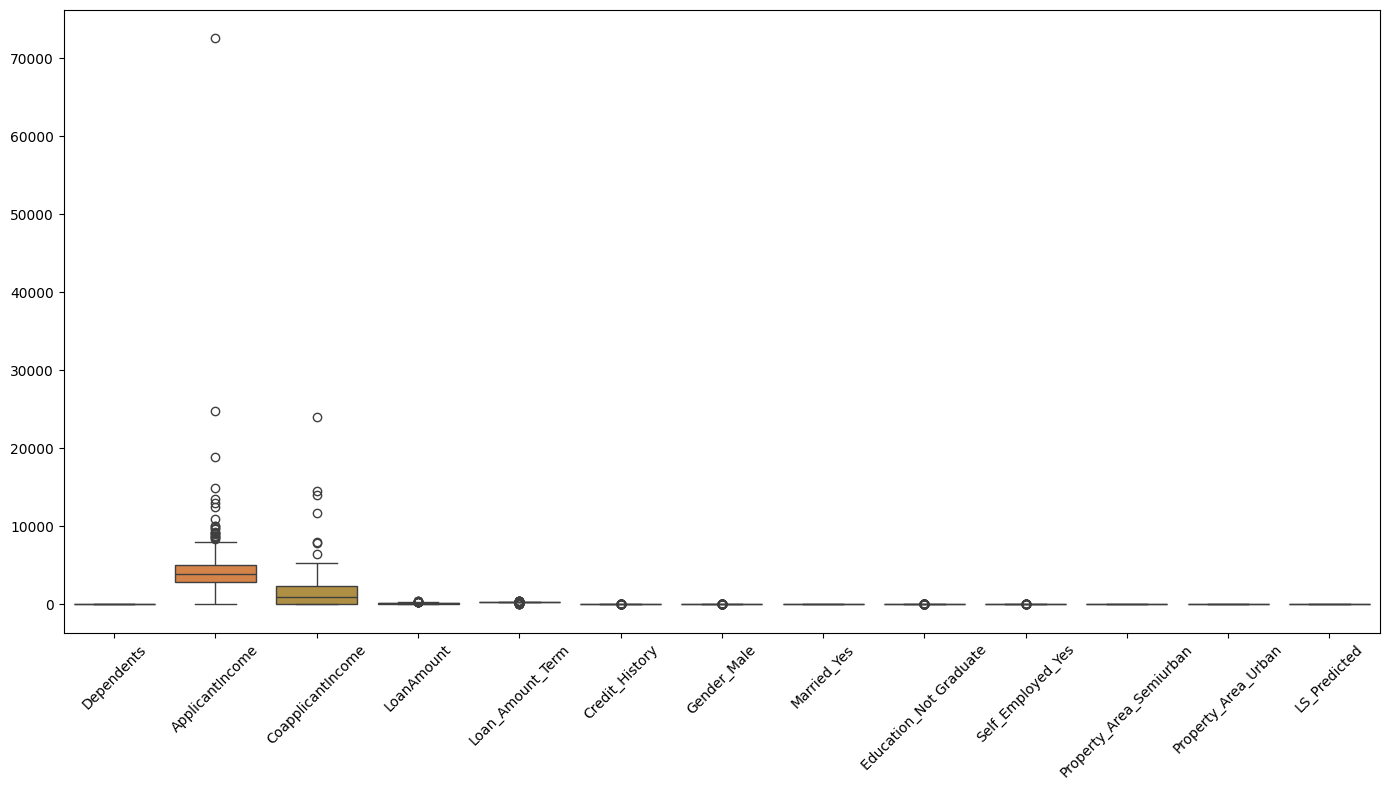

In [144]:

plt.figure(figsize=(14,8))
sns.boxplot(df_test)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [136]:
pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [137]:
df_test = pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])

In [138]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [139]:
dt.predict(df_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0])

In [140]:
res = dt.predict(df_test)

In [141]:
df_test["LS_Predicted"] = res

In [142]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LS_Predicted
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0,1
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1,0
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0
